 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://www.nicepng.com/png/full/204-2043038_white-lightbulb-icon-light-bulb-icon-white.png" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%">    PPG from Smartphone Camera </span> </div>

# I. Introduction
<br>
<div class="title"style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

Nowadays, almost everyone has one smartphone. These devices are equipped with powerful cameras and a white light source, the flash LED, and are capable of recording videos at 30 frames per second.
Placing the finger over the phone flash and black camera, the volume changes of blood flow are noticeable on the intensity of the video and it is possible to extract the photoplethysmogram from this source.

## <div style="color:#00a0e4"> 1. Background </div>

The photoplethysmogram (PPG) is a widely used medical exam which is capable of measuring blood volume changes.
A light source illuminates the finger and the transmitted or reflected light is measured.
Blood contains hemoglobyn which absorves light with wavelengths in the visible spectrum. The absorption is depedent of the incident wavelength as can be seen in the following Figure:
<img src="https://i.imgur.com/XNoJQ7U.png"/>
<p style="text-align: center;"><i>https://omlc.org/spectra/hemoglobin/</i></p>

When emmitting light to the finger, the surrounding tisseus also reflect part of the light, but, since these tissues are static, the ammount of light reflected is constant and constitutes a DC signal. When there is an increase of blood flow, e.g., during cardiac systole, the volume of blood in the finger blood vessels increases, resulting in an variation of the level of light reflected, generating an AC signal, which is time dependent.
The PPG signal results from this AC signal and it is possible to retrieve it using only the smartphone flash which acts as light source and the phone camera which acts as light sensor.

## <div style="color:#00a0e4"> 2. Objectives</div>
* Understand how the PPG is measured
* Record a suitable video (optional)
* Learn how to iterate over and process every frame of a video
* Extract the PPG signal from a video

## <div style="color:#00a0e4"> 3. Materials (optional) </div>
* Python 3.5 (or higher)
* matplotlib
* numpy
* opencv-python
* Smartphone (optional)

`Camera`, `PPG`, `Signal`, `Smartphone`, `Video`

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

This section should guide the students during their experimental procedure, and contain the most relevant content.

### <div style="color:#00a0e4">  1. Requirements </div>

In this section, the libraries required should be installed, using the command:

In [4]:
!pip3 install matplotlib numpy opencv-python biosppy >/dev/null 2>&1


and imported:

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import biosppy.signals.tools as st

### <div style="color:#00a0e4">  2. Data Acquisition (optional) </div>

This step is optional. If you wish to use the example video, download it [here](https://raw.githubusercontent.com/PIA-Group/ScientIST-notebooks/master/X.Example_Files/ppg.mp4).

To acquire a valid video for PPG extraction, you must place the finger over your phone flash and back camera, totally covering both of them.
<img src="https://i.imgur.com/UtfXJVP.jpg"/>
<p style="text-align: center;"><i>Chan, Pak Hei et al. (2016). Diagnostic Performance of a Smartphone‐Based Photoplethysmographic Application for Atrial Fibrillation Screening in a Primary Care Setting. Journal of the American Heart Association.</i></p>

Then, you must remain very still and record a video. A short clip, about 10 seconds, is more than enough for this experiment.
After acquisition, you should copy the video file to your computer.

### <div style="color:#00a0e4">   3. Import Data</div>

#### <div style="color:#00a0e4">   3.1. Set the Video Path  </div>

In [39]:
video_path = '/home/<username>/Downloads/ppg.mp4'

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    You must set the correct path to your video file or to the file downloaded to your computer      
</div>

#### <div style="color:#00a0e4">   3.2. Load the Video  </div>

In [48]:
video = cv2.VideoCapture(video_path)
fs = 30 # sampling rate, 30 FPS
success, image = video.read()
if not success:
    raise ValueError('Failed reading video')

### <div style="color:#00a0e4">   4. Extract PPG Signal</div>

#### <div style="color:#00a0e4"> 4.1 Initialize Array</div>

An array is initialized which will store the values of our PPG signal, therefore, its length is the same as the number of frames of the video.

In [41]:
nr_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
ppg = np.zeros((nr_frames, 1))

#### <div style="color:#00a0e4"> 4.2 Processing Every Frame</div>

We'll now iterate over every frame of the video with a `while` loop. We keep track of the frame number so we know the correct position of the `ppg` array to store the computed value in.

For every frame, the average pixel intensity value is computed. In this case, we use the **red** channel since it translates into a good signal.

Every frame is represented in a 3-dimensional matrix, named `image` in our code. The first two dimensions correspond to the rows and columns of the image and the last dimension corresponds to the different color channels. OpenCV uses the BGR color format, which means that the red channel will be the third channel of our matrix.

In [42]:
n = 0
while success:
    red = image[..., 2]
    ppg[n] = np.mean(red)
    n+=1
    success, image = video.read()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217


<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    The execution of this snippet may take a while     
</div>

### <div style="color:#00a0e4">   5. Plot the Signal</div>

You now have the average value of each red frame stored in the `ppg` array. This array represents the PPG signal and can be easily plotted.

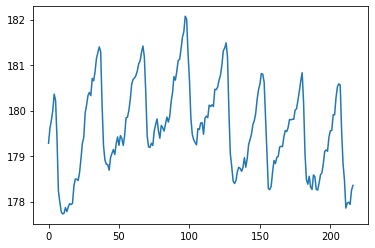

In [44]:
plt.plot(ppg)

The PPG signal is typically display inverted, which is easily accomplishable:

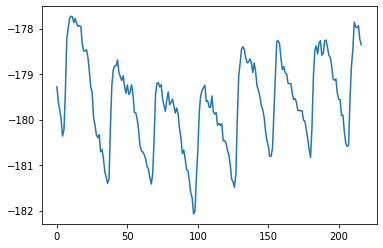

In [46]:
ppg_inverted = -ppg
plt.plot(ppg_inverted)

### <div style="color:#00a0e4">   6. Filter the Signal</div>

A band-pass filter can be applied to improve the quality of the signal and also remove the DC offset.
Using the [BioSPPy](https://github.com/PIA-Group/BioSPPy) toolbox this is simple to do.

In [54]:
len(ppg_inverted)

217

In [61]:
ppg_filtered, _, _ = st.filter_signal(
    signal=ppg_inverted,
    ftype="butter",
    band="bandpass",
    order=4,
    frequency=[1, 8],
    sampling_rate=float(fs),
)


ValueError: The length of the input vector x must be greater than padlen, which is 27.

#### <div style="color:#00a0e4">   3.2. Table Example  </div>

In [ ]:
#---
import pandas as pd
import csv
#---

url = 'https://raw.githubusercontent.com/JoanaFigPinto//notebooksIT/master/Example_Files/example-table.csv'
dados = pd.read_csv(url, delimiter = ';')

dados
dados.style.set_table_styles([dict(selector="th", props=[("font-size", "125%"),("color", "black"),
                               ("text-align", "center")]), 
                             dict(selector="tr", props=[("color", "#00a0e4"),
                               ("text-align", "center")])])

#### <div style="color:#00a0e4">   3.3. Referring to other notebooks/material - Example  </div>

Throughout the text, it might be useful to refer to another notebooks or material saved in the repository. <br>
That can be used the following example format:  <br>
[OpenSignals](../1.Signal_Acquisition/OpenSignals.ipynb) <br>
[ScienceJournal](../1.Signal_Acquisition/ScienceJournal.ipynb)



#### <div style="color:#00a0e4">   3.4. Using sample of code in Python - Example  </div>

In [ ]:
# use the "Code" cell type

#### <div style="color:#00a0e4">   3.5. Using sample of code from other languages - Example  </div>

Use the "Markdown" cell type 

```java

click twice to see example
int n=1

```

#### <div style="color:#00a0e4">   3.6. Notes and Warnings - Example  </div>

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    The warning must be explained here...      
</div>

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    The note must be explained here...     
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    The explore more advice must be explained here...      
</div>

<div style="background:#fe9b29;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Caution! </span> <br>
  <div style="background:#ffdab0;font-size:12px"> 
    The caution must be explained here...     
</div>

# III. Explore
<br>
<div class='h1'  style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

Remember ...  


### <div style="color:#00a0e4">  1. Final Notes (optional) </div>

### <div style="color:#00a0e4">  2. Quiz (optional)  </div>

### <div style="color:#00a0e4">  3. Further Reading  </div>

<div style="height:115px; background:white;border-radius:10px;text-align:center"> 

<img src="https://www.lx.it.pt/~asmc/predict/images/IT.png" alt="it" style="position: relative; margin-left: 10px; bottom:-55px;max-width:150px;height:auto;"/> 
<img src="https://cqe.tecnico.ulisboa.pt/files/files/logos/IST_A_RGB_POS.png"
         alt="alternate text" 
         style="position: relative; margin-left: 10px;  bottom:-50px; width:150px;height:auto;"/>
</div> 

<div style="width: 100%; ">
    <div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
  <span style="font-size:20px;position:relative; top:-25px">  Suggestions are welcome! </span> <br>
 <span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback at jehdwne@it.lx.pt</span> 
</div>